In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyexpat import features

In [38]:
df=pd.read_csv("../Assets/6 advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.10000,37.80000,69.20000,22.10000
1,44.50000,39.30000,45.10000,10.40000
2,17.20000,45.90000,69.30000,12.00000
3,151.50000,41.30000,58.50000,16.50000
4,180.80000,10.80000,58.40000,17.90000


In [39]:
#It is a supervised Learning problem -it has label data (have both input and output column)
#In supervised it is regression problem -it has continous value

In [40]:
#Sales-output column and rest input column

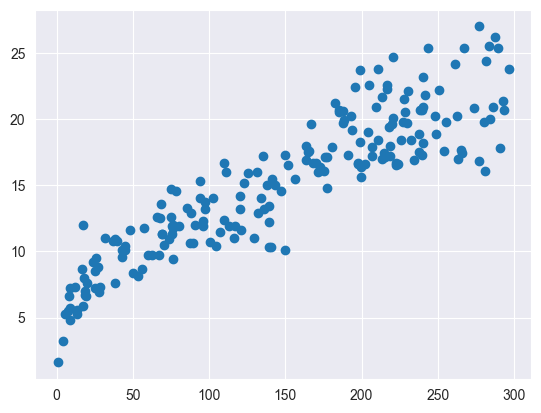

In [41]:
plt.scatter(x=df['TV'],y=df['Sales'])

#It is linear

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop('Sales', axis=1),df['Sales'],test_size=0.2,random_state=42)

#Note
#instead of using drop method we can also use iloc
# df.iloc[:,:-1] it means taking all rows all columns except the last one

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [44]:
#Applying Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train) #80% data is sent for training
y_pred=lr.predict(X_test) #testing the model on 20% of input data but we cannot use y test 20% data as it is used for comparison purpose

In [46]:
y_pred #This will produce the values like an close value when given the input ,because no model can be perfect , so it must be close to the accurrate value.

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [47]:
#Error Checking for the model

from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred) #calculating error from the model as the predicted output is how much vary from the exact output

1.2748262109549338

In [48]:
"""R2 score- Imagine a teacher wants to predict a student's marks based on the number of hours they study.

The actual marks are what the student really scored.

The predicted marks are what the teacher thinks the student will score.

Now:

If the teacher’s guesses are very close to actual marks, R² will be close to 1.

If the guesses are completely off, R² will be near 0 or negative

R² = 1 → model is perfect 🏆

R² = 0 → model is as good as just guessing average 🤷

R² = -1 → model is worse than guessing average"""

r2_score(y_test,y_pred) #1.0-means model is 100% perfect fit

0.9059011844150826

In [61]:
def predict_sales( tv_budget,Radio_budget,newsapaper_budget):
    features=np.array([[tv_budget,Radio_budget,newsapaper_budget]])
    results=lr.predict(features).reshape(1,-1)


    '''| Code              | Meaning                 | Shape  |
| ----------------- | ----------------------- | ------ |
| `.reshape(1, -1)` | 1 row, auto-fit columns | (1, n) |
| `.reshape(-1, 1)` | 1 column, auto-fit rows | (n, 1) |
| `.reshape(-1,)`   | Flatten to 1D array     | (n,)   |
'''
    return results[0]


In [62]:
df.iloc[0]

TV          230.10000
Radio        37.80000
Newspaper    69.20000
Sales        22.10000
Name: 0, dtype: float64

In [63]:
tv_budget=230.1
Radio_budget=37.8
newspaper_budget=69.2
sales=predict_sales(tv_budget,Radio_budget,newspaper_budget)

C:\Users\risha\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
print(sales)

[21.37254028]


In [65]:
import pickle #this library is used to save your model

pickle.dump(lr, open('Projects/Project1/Linear_regression_model.pkl', 'wb'))